Project 1: Exploratory Data Analysis for data set - U.S. Chronic Disease Indicators (CDI)
Data Set: https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD
This notebook aims to validate the hypothesis that the probability of a disease to happen is related to where it happened, the location and estimate the most occured diseases and risk variables that are affecting public health.

In [1]:
import numpy as np
import pandas as pd

#Visualization 
# plotly
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Utils 
import datetime
import warnings

# File format 
import csv
import json
import xml.etree.ElementTree as ET
warnings.filterwarnings("ignore")

In [2]:
#Read the CSV file.
df = pd.read_csv("C:/Users/Rashmini/Downloads/U.S._Chronic_Disease_Indicators__CDI_ (1).csv", sep=',')

In [3]:
df.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
5,2015,2015,MT,Montana,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,30,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
6,2013,2013,OR,Oregon,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,41,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
7,2013,2013,PR,Puerto Rico,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,72,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
8,2017,2017,PR,Puerto Rico,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,72,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
9,2010,2010,WI,Wisconsin,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,55,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1185676, 34)

In [5]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [6]:
df.describe()

,YearStart,YearEnd,Response,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,1.185676e+06,1.185676e+06,0.0,8.045780e+05,682380.000000,682380.000000,0.0,0.0,0.0,0.0,0.0,1.185676e+06,0.0,0.0,0.0,0.0
mean,2.015103e+03,2.015643e+03,NaN,1.005325e+03,50.264623,61.873881,NaN,NaN,NaN,NaN,NaN,3.078907e+01,NaN,NaN,NaN,NaN
std,3.320259e+00,3.001197e+00,NaN,1.880433e+04,89.004848,100.104303,NaN,NaN,NaN,NaN,NaN,1.750972e+01,NaN,NaN,NaN,NaN
min,2.001000e+03,2.001000e+03,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN
25%,2.013000e+03,2.013000e+03,NaN,1.610000e+01,11.000000,16.300000,NaN,NaN,NaN,NaN,NaN,1.700000e+01,NaN,NaN,NaN,NaN
50%,2.015000e+03,2.016000e+03,NaN,4.000000e+01,28.500000,41.000000,NaN,NaN,NaN,NaN,NaN,3.000000e+01,NaN,NaN,NaN,NaN
75%,2.018000e+03,2.018000e+03,NaN,7.600000e+01,56.300000,71.100000,NaN,NaN,NaN,NaN,NaN,4.500000e+01,NaN,NaN,NaN,NaN
max,2.021000e+03,2.021000e+03,NaN,2.925456e+06,2541.600000,3530.500000,NaN,NaN,NaN,NaN,NaN,7.800000e+01,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [8]:
df.nunique()

YearStart                       16
YearEnd                         16
LocationAbbr                    55
LocationDesc                    55
DataSource                      31
Topic                           17
Question                       203
Response                         0
DataValueUnit                   12
DataValueType                   19
DataValue                    50436
DataValueAlt                 41213
DataValueFootnoteSymbol         17
DatavalueFootnote               18
LowConfidenceLimit           22464
HighConfidenceLimit          24000
StratificationCategory1          3
Stratification1                 11
StratificationCategory2          0
Stratification2                  0
StratificationCategory3          0
Stratification3                  0
GeoLocation                     54
ResponseID                       0
LocationID                      55
TopicID                         17
QuestionID                     203
DataValueTypeID                 19
StratificationCatego

In [9]:
# Drop unnecessary columns which has no values associated with them.
df.drop(['Response','DataValueUnit','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','LowConfidenceLimit','HighConfidenceLimit','StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','ResponseID','StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3'], axis=1, inplace=True)
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueType,DataValue,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,Number,916,Gender,Male,POINT (-92.27449074299966 34.74865012400045),5,AST,AST3_1,NMBR,GENDER,GENM
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,Number,2227,Overall,Overall,POINT (-106.13361092099967 38.843840757000464),8,AST,AST3_1,NMBR,OVERALL,OVR
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,Number,708,Overall,Overall,POINT (-77.036871 38.907192),11,AST,AST3_1,NMBR,OVERALL,OVR
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,Number,3520,Gender,Female,POINT (-83.62758034599966 32.83968109300048),13,AST,AST3_1,NMBR,GENDER,GENF
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,Number,123,Race/Ethnicity,Hispanic,POINT (-84.71439026999968 44.6613195430005),26,AST,AST3_1,NMBR,RACE,HIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,Age-adjusted Prevalence,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,DIA,DIA7_0,AGEADJPREV,RACE,WHT
1185672,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,Crude Prevalence,41.5,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,OLD,OLD3_1,CRDPREV,RACE,WHT
1185673,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,Age-adjusted Prevalence,NaN,Race/Ethnicity,Hispanic,POINT (-93.81649055599968 42.46940091300047),19,ART,ART2_1,AGEADJPREV,RACE,HIS
1185674,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,Crude Prevalence,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,DIA,DIA2_2,CRDPREV,RACE,HIS


In [10]:
# Check if data has any Null values
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
DataValueType                     0
DataValue                    378734
StratificationCategory1           0
Stratification1                   0
GeoLocation                   10166
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
dtype: int64

In [11]:
# Drop the rows which contains null values
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueType,DataValue,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,Number,916,Gender,Male,POINT (-92.27449074299966 34.74865012400045),5,AST,AST3_1,NMBR,GENDER,GENM
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,Number,2227,Overall,Overall,POINT (-106.13361092099967 38.843840757000464),8,AST,AST3_1,NMBR,OVERALL,OVR
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,Number,708,Overall,Overall,POINT (-77.036871 38.907192),11,AST,AST3_1,NMBR,OVERALL,OVR
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,Number,3520,Gender,Female,POINT (-83.62758034599966 32.83968109300048),13,AST,AST3_1,NMBR,GENDER,GENF
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,Number,123,Race/Ethnicity,Hispanic,POINT (-84.71439026999968 44.6613195430005),26,AST,AST3_1,NMBR,RACE,HIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797178,2017,2017,VT,Vermont,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,Crude Prevalence,53.8,Race/Ethnicity,"Other, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,ART,ART2_1,CRDPREV,RACE,OTH
797179,2019,2019,ME,Maine,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,Crude Prevalence,73.7,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-68.98503133599962 45.254228894000505),23,ART,ART2_1,CRDPREV,RACE,MRC
797180,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,Crude Prevalence,57.6,Race/Ethnicity,"Other, non-Hispanic",POINT (-97.52107021399968 35.47203135600046),40,ART,ART2_1,CRDPREV,RACE,OTH
797181,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,Crude Prevalence,41.5,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,OLD,OLD3_1,CRDPREV,RACE,WHT


In [12]:
#check if the null value row are dropped
df.isnull().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueType                0
DataValue                    0
StratificationCategory1      0
Stratification1              0
GeoLocation                  0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64

In [13]:
#check the unique values associated to column 'Topic'
df['Topic'].unique()

array(['Asthma', 'Cancer', 'Chronic Kidney Disease',
       'Chronic Obstructive Pulmonary Disease', 'Cardiovascular Disease',
       'Diabetes', 'Alcohol', 'Arthritis', 'Tobacco', 'Disability',
       'Nutrition, Physical Activity, and Weight Status', 'Mental Health',
       'Older Adults', 'Oral Health', 'Overarching Conditions',
       'Reproductive Health', 'Immunization'], dtype=object)

<b>For the Top 10 Diseases(Topics), Plot the graph to see the most frequently occured disease 

Topic
Chronic Obstructive Pulmonary Disease              2.148997e+08
Cardiovascular Disease                             1.160391e+08
Cancer                                             8.658903e+07
Diabetes                                           7.793251e+07
Overarching Conditions                             2.394701e+07
Asthma                                             1.416545e+07
Chronic Kidney Disease                             9.722833e+06
Older Adults                                       9.370383e+06
Nutrition, Physical Activity, and Weight Status    2.111340e+06
Arthritis                                          1.947367e+06
Name: DataValue, dtype: float64


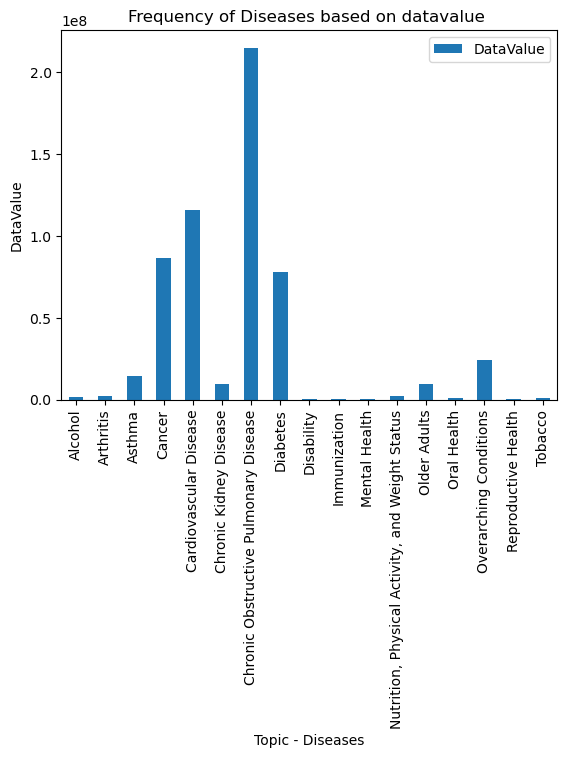

In [14]:
# convert the 'DataValue' column to a numeric data type
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

# drop rows with null values in the 'DataValue' column
df.dropna(subset=['DataValue'], inplace=True)

#get the sum of datavalues grouped for each topic
datavalue_df = df.groupby('Topic')['DataValue'].sum().reset_index()

#get top 10 topics 
top_10_topics = df.groupby('Topic')['DataValue'].sum().sort_values(ascending=False).head(10)
print(top_10_topics)

datavalue_df.plot(kind='bar', x='Topic', y='DataValue')
plt.title('Frequency of Diseases based on datavalue ')
plt.xlabel('Topic - Diseases')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

In [15]:
#check the unique YearStarts from the dataset
unique_yearstart = df['YearStart'].unique()
unique_yearstart.sort()
print(unique_yearstart)

[2001 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021]


<b>Print the most occured disease in each year

In [16]:
top_disease_by_year= df.groupby(['YearStart', 'Topic'])['DataValue'].sum().reset_index()
idx = top_disease_by_year.groupby('YearStart')['DataValue'].idxmax()
top_disease_by_year = top_disease_by_year.loc[idx][['YearStart', 'Topic']]
top_disease_by_year.set_index('YearStart', inplace=True)
print(top_disease_by_year)


                                           Topic
YearStart                                       
2001                      Overarching Conditions
2007                                     Tobacco
2008                                      Cancer
2009                                      Cancer
2010       Chronic Obstructive Pulmonary Disease
2011                                      Cancer
2012                                      Cancer
2013       Chronic Obstructive Pulmonary Disease
2014       Chronic Obstructive Pulmonary Disease
2015       Chronic Obstructive Pulmonary Disease
2016       Chronic Obstructive Pulmonary Disease
2017       Chronic Obstructive Pulmonary Disease
2018       Chronic Obstructive Pulmonary Disease
2019       Chronic Obstructive Pulmonary Disease
2020                      Cardiovascular Disease
2021                                    Diabetes


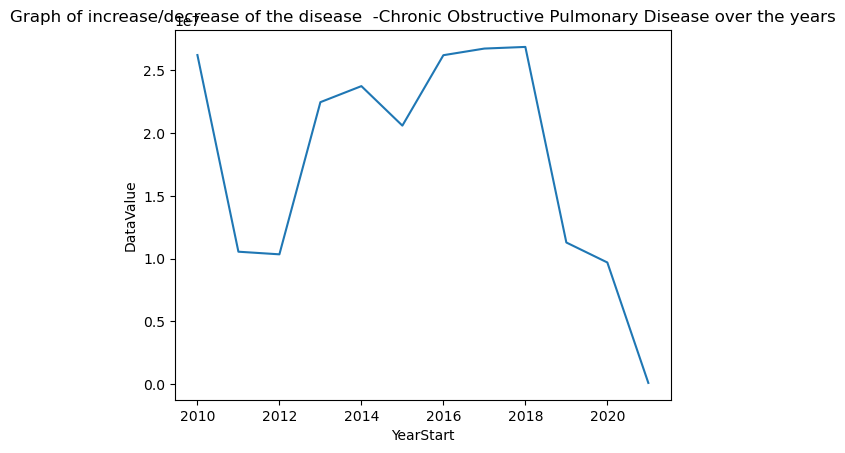

In [17]:
# filter the DataFrame to get only the rows for topic - 'Chronic Obstructive Pulmonary Disease'
Pulmonary_df = df[df['Topic'] == 'Chronic Obstructive Pulmonary Disease']

# group the data by 'YearStart' and calculate the sum of 'DataValue' for each year
group_yearstart_df = Pulmonary_df.groupby('YearStart')['DataValue'].sum().reset_index()

# plot a line graph of the sum of 'DataValue' for each year
plt.plot(group_yearstart_df['YearStart'], group_yearstart_df['DataValue'])

# set the title and axis labels for the graph
plt.title('Graph of increase/decrease of the disease  -Chronic Obstructive Pulmonary Disease over the years')
plt.xlabel('YearStart')
plt.ylabel('DataValue')

# display the graph
plt.show()


<b>Plot the graphs of Increase in the growth of Top 3 most occured diseases over the years.

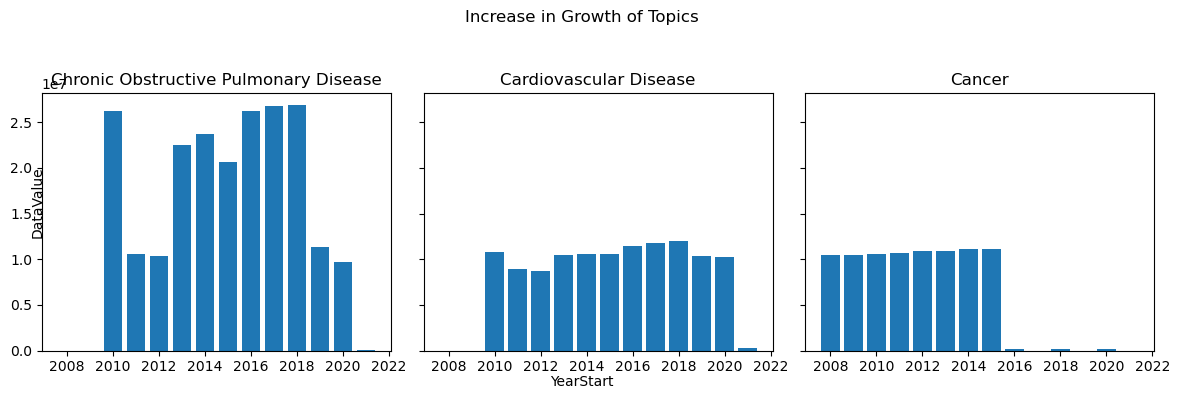

In [19]:
# create a list of the topics to plot
top3_diseases = ['Chronic Obstructive Pulmonary Disease', 'Cardiovascular Disease', 'Cancer']

# create a new DataFrame which contains only the rows for these three topics
topic_df = df[df['Topic'].isin(top3_diseases)]

# group the data by 'YearStart' and 'Topic', and calculate the sum of 'DataValue' for each group
groupedyearstart_df = topic_df.groupby(['YearStart', 'Topic'])['DataValue'].sum().reset_index()

# plot a graph with subplots for each topic
fig, axs = plt.subplots(nrows=1, ncols=len(top3_diseases), figsize=(12, 4), sharex=True, sharey=True)

# plot a bar graph for each topic in a separate subplot
for i, topic in enumerate(top3_diseases):
    topic_data = groupedyearstart_df[groupedyearstart_df['Topic'] == topic]
    axs[i].bar(topic_data['YearStart'], topic_data['DataValue'])
    axs[i].set_title(topic)

# set the title and axis labels for the figure
fig.suptitle('Increase in Growth of Topics')
fig.text(0.5, 0.04, 'YearStart', ha='center')
fig.text(0.04, 0.5, 'DataValue', va='center', rotation='vertical')

# adjust the spacing between subplots
fig.tight_layout(pad=2)

# display the figure
plt.show()


<b>Plot the graph to understand the increase of Chronic Obstructive Pulmonary Disease in Maryland

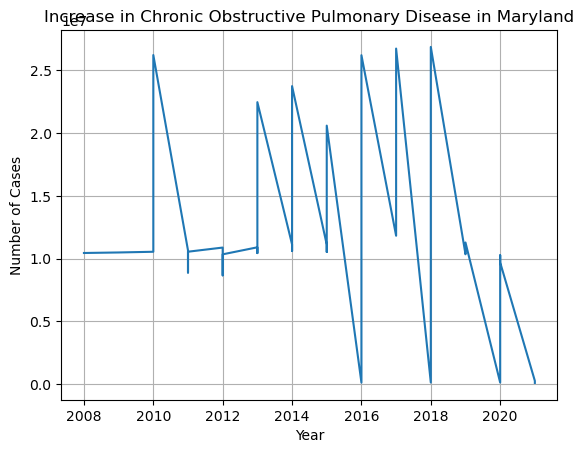

In [20]:
# set the topic and location to plot
topic1_disease = 'Chronic Obstructive Pulmonary Disease'
location = 'Maryland'

# filter the data for the specified topic and location
topic_df = df[(df['Topic'] == topic1_disease) & (df['LocationDesc'] == location)]

# group the data by 'YearStart' and calculate the sum of 'DataValue' for each year
#grouped_df = topic_df.groupby(['YearStart'])['DataValue'].sum().reset_index()

# plot a line graph for the 'DataValue' over time
plt.plot(groupedyearstart_df['YearStart'], groupedyearstart_df['DataValue'])

# set the title and axis labels for the graph
plt.title(f'Increase in {topic1_disease} in {location}')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# add a grid to the graph
plt.grid()

# display the graph
plt.show()


 <b>Get top 10 cities by disease

In [21]:
df_loc= df[(df['GeoLocation'].notnull())]
#Convert to float and transform errors in nan
df_loc['DataValue'] = pd.to_numeric(df_loc['DataValue'], errors='coerce')
top_10_cities = (df_loc.assign(rank=df_loc.groupby(['Topic'])['DataValue']
                     .rank(method='dense', ascending=False))
                     .query('rank <= 10')
                     .sort_values(['Topic', 'rank']))

In [22]:
top_10_cities.rename(columns={'LocationDesc':'city'}, inplace=True)
print(top_10_cities)

        YearStart  YearEnd LocationAbbr           city DataSource    Topic  \
8180         2020     2020           CA     California       NVSS  Alcohol   
8522         2019     2019           CA     California       NVSS  Alcohol   
552          2015     2015           CA     California       NVSS  Alcohol   
3161         2018     2018           CA     California       NVSS  Alcohol   
7629         2017     2017           CA     California       NVSS  Alcohol   
...           ...      ...          ...            ...        ...      ...   
362188       2016     2016           NH  New Hampshire      STATE  Tobacco   
786350       2011     2011           WI      Wisconsin      BRFSS  Tobacco   
363748       2014     2014           NH  New Hampshire      STATE  Tobacco   
365740       2013     2013           NH  New Hampshire      STATE  Tobacco   
660272       2012     2012           NY       New York      BRFSS  Tobacco   

                                                 Question     D

<b>Plot the graph to see Frequency of Cities in top 10 ranking for diseases

In [23]:
num_cities = (
    top_10_cities
    .groupby('city')['Topic']
    .nunique()
    .to_frame('Number of times in top 10')
    .reset_index()
    .sort_values(['Number of times in top 10'], ascending=True) # Since the orientation is horizontal, the sort must be the inverse order of what I want
)

data = [go.Bar(
            y=num_cities['city'],
            x=num_cities['Number of times in top 10'],
            orientation = 'h',
            text=num_cities['Number of times in top 10']
    )]

layout = go.Layout(
    title='Frequency of Cities in top 10 ranking for diseases',
    titlefont=dict(size=20),
    width=1000,
    height=1400,
    yaxis=go.layout.YAxis(
        ticktext=num_cities['city'],
        tickmode='array',
        automargin=True
    )
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

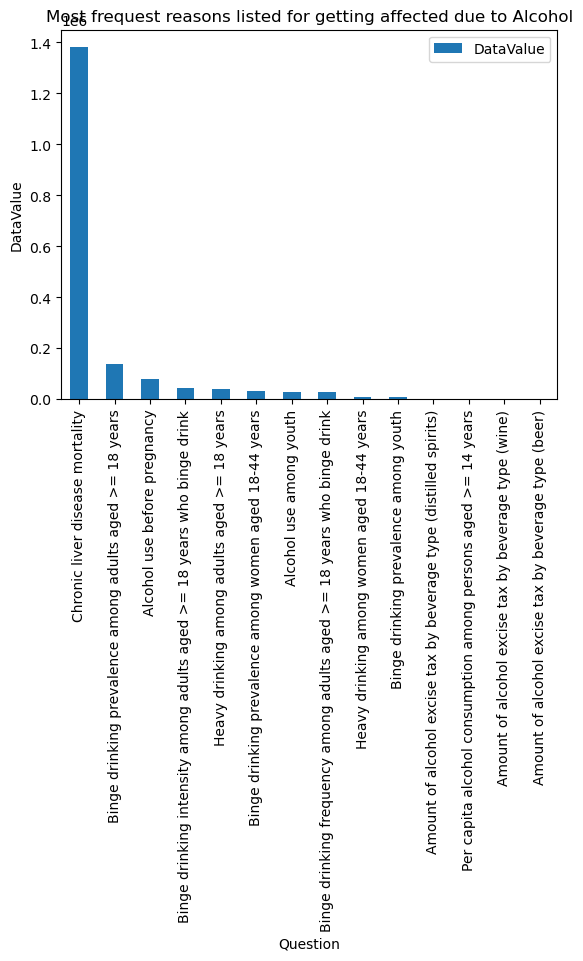

In [24]:
# create a new DataFrame containing only the rows for the column 'Alcohol'
alcohol_df = df[df['Topic'] == 'Alcohol']

# get the unique values of 'Question'
unique_questions = alcohol_df['Question'].unique()

# create a df to store the sum of 'DataValue' for each unique question
q_data = {}

# loop through the unique questions and calculate the sum of 'DataValue' for each of them
for question in unique_questions:
    q_data[question] = alcohol_df[alcohol_df['Question'] == question]['DataValue'].sum()

# create a DataFrame from the dictionary
question_df = pd.DataFrame.from_dict(q_data, orient='index', columns=['DataValue'])

# sort the DataFrame by 'DataValue'
question_df = question_df.sort_values(by='DataValue', ascending=False)

# plot a bar graph of the sum of 'DataValue' for each unique question
question_df.plot(kind='bar')

# set the title and axis labels for the graph
plt.title('Most frequest reasons listed for getting affected due to Alcohol')
plt.xlabel('Question')
plt.ylabel('DataValue')

# rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# display the graph
plt.show()


Results :

As seen in the above charts, the most highly occured disease is 'Chronic Obstructive Pulmonary Disease' followed by 'Cardiovascular Disease' and 'Cancer'. And probability of a disease to occur is correlated to the location. Also listed Most frequest reasons listed for getting affected due to Alcohol. 